PREPARACION DEL ARCHIVO DE DATOS PARA EL CONSUMO DEL MODELO DE PREDICCION DE PUNTAJES DE RESTAURANTES.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from mpl_toolkits.basemap import Basemap

In [7]:
ruta = r'C:\Users\franc\OneDrive\Escritorio\Henry\Cursado Henry\PF\ML_pruebas\servicio_restaurantes.csv'

data = pd.read_csv(ruta)

In [65]:
data.head()

,id_servicios_restaurantes,servicios_restaurantes,direccion,id_condado,condado,codigo_postal_condado,latitud_condado,longitud_condado,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,estado,categorias,puntuacion_usuarios,analisis_sentimientos,url_del_negocio,enlaces_google_maps,anio
0,05HTY,ruby tuesday,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.503323,-81.458029,Florida,NaN,NaN,NaN,NaN,NaN,2023
1,R252A,denny's,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.502807,-81.458022,Florida,NaN,NaN,NaN,NaN,NaN,2023
2,U8STH,el puerto argentinean grill,"North 17th Street, Ybor City",uHNL,Hillsborough,"33602, 33647, 33511",27.990360,-82.301773,w2w7,brandon,33605,27.958677,-82.440585,Florida,NaN,NaN,NaN,NaN,NaN,2023
3,A9XWK,la terrazza restaurant,"1727, East 7th Avenue",uHNL,Hillsborough,"33602, 33647, 33511",27.990360,-82.301773,w2w7,brandon,33605,27.960129,-82.439679,Florida,NaN,NaN,NaN,NaN,NaN,2023
4,SEKWE,the country club of florida,"22, Country Road",WpVu,Palm Beach,"33401, 33411, 33480",26.651450,-80.276733,at0h,west palm beach,33436,26.504356,-80.103306,Florida,NaN,NaN,NaN,NaN,NaN,2023


In [66]:
# Nos quedamos solo con los datos que no interesa para el modelo.

puntajes_lat_long = data[['id_servicios_restaurantes','latitud_ciudad', 'longitud_ciudad','puntuacion_usuarios','anio']]

In [67]:
puntajes_lat_long.head()

,id_servicios_restaurantes,latitud_ciudad,longitud_ciudad,puntuacion_usuarios,anio
0,05HTY,28.503323,-81.458029,NaN,2023
1,R252A,28.502807,-81.458022,NaN,2023
2,U8STH,27.958677,-82.440585,NaN,2023
3,A9XWK,27.960129,-82.439679,NaN,2023
4,SEKWE,26.504356,-80.103306,NaN,2023


In [24]:
puntajes_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  70391 non-null  object 
 1   latitud_ciudad             70391 non-null  float64
 2   longitud_ciudad            70391 non-null  float64
 3   puntuacion_usuarios        61252 non-null  float64
 4   anio                       70391 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ MB


In [68]:
# Eliminamos todas las filas que no tengan puntaje, ya que no aportan valor al analisis. 

puntajes_lat_long.dropna(subset=['puntuacion_usuarios'], inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_20492\4134900312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntajes_lat_long.dropna(subset=['puntuacion_usuarios'], inplace=True)


In [69]:
puntajes_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61252 entries, 9139 to 70390
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  61252 non-null  object 
 1   latitud_ciudad             61252 non-null  float64
 2   longitud_ciudad            61252 non-null  float64
 3   puntuacion_usuarios        61252 non-null  float64
 4   anio                       61252 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


In [27]:
puntajes_lat_long.describe()

,latitud_ciudad,longitud_ciudad,puntuacion_usuarios,anio
count,61252.000000,61252.000000,61252.000000,61252.000000
mean,27.868324,-82.256188,3.952237,2018.793362
std,0.887243,0.984925,0.629030,4.462955
min,24.547407,-87.431983,1.000000,2010.000000
25%,27.767127,-82.703433,3.500000,2015.000000
50%,27.951690,-82.458753,4.000000,2019.000000
75%,28.030276,-82.275647,4.500000,2024.000000
max,30.956469,-80.036594,5.000000,2024.000000


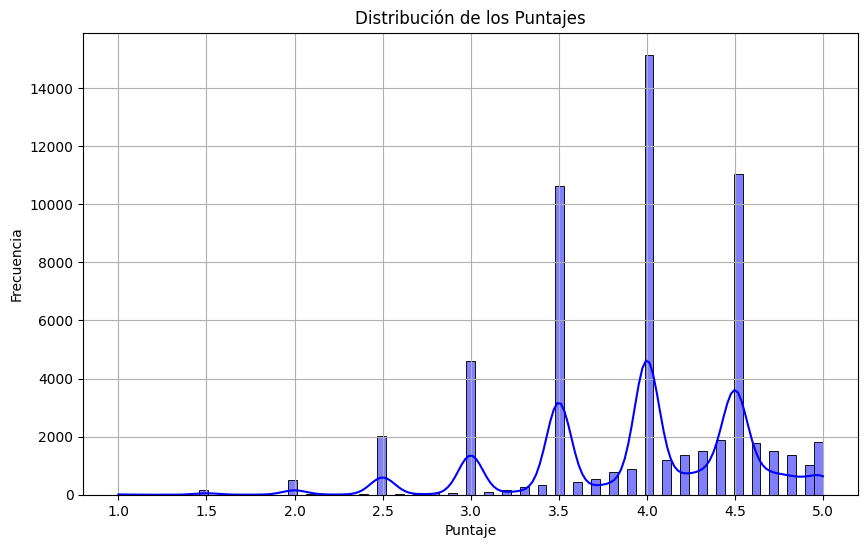

In [70]:
puntajes = puntajes_lat_long['puntuacion_usuarios']

# Crear el histograma y la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(puntajes, kde=True, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de los Puntajes')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [71]:
# Veamos la cantidad de restaurantes unicos que tenemos en nuestros datos a lo largo de los años 2010 - 2024.

puntajes_lat_long['id_servicios_restaurantes'].nunique()

12333

In [42]:
puntajes_lat_long['anio'].unique()

array([2024, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

VAMOS A UTILIZAR SOLAMENTE LOS PUNTAJES QUE CORRESPONDEN A LOS ULTIMOS 5 AÑOS. ESTO ES PARA TENER UNA INFORMACION ACTUALIZADA.

In [72]:
puntajes_lat_long[(puntajes_lat_long['anio'] >= 2019) & (puntajes_lat_long['anio'] <= 2024)]['id_servicios_restaurantes'].nunique()

10433

In [ ]:
# Vamos a armar el dataset promediando el puntaje de los años 
# pero solo de los ultimos 5 años (2019 a 2024) para que corresponda un puntaje actualizado.

In [73]:
puntajes_lat_long = puntajes_lat_long[(puntajes_lat_long['anio'] >= 2019) & (puntajes_lat_long['anio'] <= 2024)]

In [96]:
puntajes_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32614 entries, 9139 to 70390
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  32614 non-null  object 
 1   latitud_ciudad             32614 non-null  float64
 2   longitud_ciudad            32614 non-null  float64
 3   puntuacion_usuarios        32614 non-null  float64
 4   anio                       32614 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [97]:
df_puntajes_lat_long = puntajes_lat_long[['id_servicios_restaurantes','latitud_ciudad','longitud_ciudad','puntuacion_usuarios']]

In [98]:
df_puntajes_lat_long.groupby(by='id_servicios_restaurantes').mean().reset_index()

,id_servicios_restaurantes,latitud_ciudad,longitud_ciudad,puntuacion_usuarios
0,001OP,27.909467,-82.787324,4.0
1,005LV,28.240527,-82.327255,3.0
2,007VI,27.866136,-82.326481,4.0
3,00RWM,28.018632,-82.112864,5.0
4,00VHO,30.461862,-84.361670,4.3
...,...,...,...,...
10428,ZZ95V,27.767127,-82.638445,3.5
10429,ZZ99M,27.951690,-82.458753,4.0
10430,ZZCKQ,27.972065,-82.828588,3.5
10431,ZZNMA,27.742813,-82.750454,4.5


In [99]:
df_puntajes_lat_long = df_puntajes_lat_long.groupby(by='id_servicios_restaurantes').mean().reset_index()

In [101]:
df_puntajes_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  10433 non-null  object 
 1   latitud_ciudad             10433 non-null  float64
 2   longitud_ciudad            10433 non-null  float64
 3   puntuacion_usuarios        10433 non-null  float64
dtypes: float64(3), object(1)
memory usage: 326.2+ KB


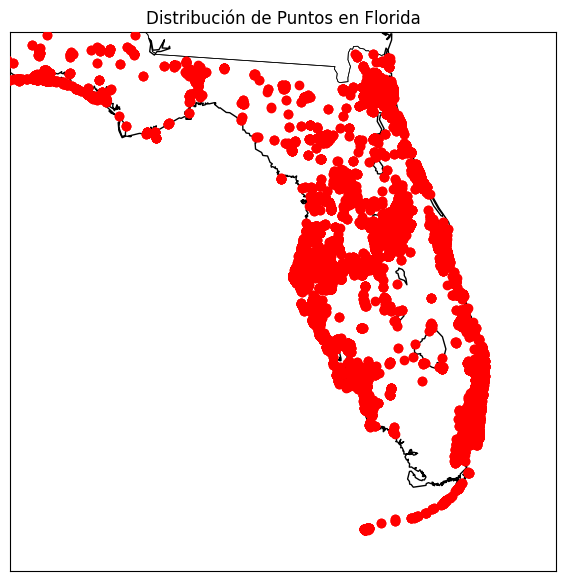

In [91]:
df_puntajes_lat_long = pd.DataFrame(data)

# Crear el mapa enfocado en Florida
fig, ax = plt.subplots(figsize=(10, 7))
mapa = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=31, llcrnrlon=-87, urcrnrlon=-79, resolution='i')

mapa.drawcoastlines()
mapa.drawcountries()
mapa.drawstates()

# Convertir latitud y longitud a coordenadas x e y
x, y = mapa(df_puntajes_lat_long['longitud_ciudad'].values, df_puntajes_lat_long['latitud_ciudad'].values)
mapa.scatter(x, y, marker='o', color='r', zorder=5)

# Mostrar el mapa
plt.title('Distribución de Puntos en Florida')
plt.show()


In [102]:
df_puntajes_lat_long.to_csv('df_puntajes_lat_long.csv', index=False)

In [103]:
df_puntajes_lat_long = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\Henry\Cursado Henry\PF\ML_pruebas\df_puntajes_lat_long.csv')